
# Assignment 2 - Machine Learning Basics

## Zhenhua Wang
Netid:  zw149

Github link: https://github.com/ZhenhuaWang96/machine-learning-course

## Learning Objectives:
1. Be able to apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
2. Understand the bias-variance tradeoff and how adjusting model flexibility impacts model selection and the training process

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**

**1)**. In this case, a flexible learning method would outperform an inflexible one. A flexible learning method has a lower bias but a higher varience. However, since we have extremely large amount of samples, I would expect that the varience would not be a serious problem. Therefore, I would prefer a flexible learning method.

**2)**. In this case, I would prefer an inflexible learning method. Since we only have limited amounts of data with extremely large amount of predictors, the data does not tell us enough information about the underlying model. Therefore, a flexible learning method would more likely to fit the noise in the data, whereas an inflexible leanring method would be more generalizable.

**3)**. In this case, a flexible learning method is better than an inflexible one. That is because the underlying true function cannot be captured by an infexible learning method, which means it would have very high bias. Therefore, a flexible learning method would be better.

**4)**. In this case, a inflexible learning method would be better. the variance of error terms is high means there are lots of noises in the data. Therefore, a flexible method would be more likely to learning the noises in the data.

## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**

(a) This is a regression problem, since its response variable is CEO salary, which is a continuous variable. In addition, we are more interested in inference, because we want to understand which factors affect CEO salary. Its sample size is 500, and the number of predictors is 3.

(b) This is a classification problem, since its response variable is success or failure. Our main goal is just to accurately predict whether a new product is a success or a failure. Therefore, we are more interested in prediction. Its sample size is 20, and its number of predictors is 13.

(c) This is a regression problem, since its response variable is the % change in the US dollar, which is a continuous variable. We are more interested in prediction, because our goal is to predict the % change in US dolars. Its sample size is 52 (there are 52 weeks in 2012), and its number of predictors is 3.

# Practical Questions

## 3
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

In [8]:
# (a) Write your own kNN classifier
import numpy as np

class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        pass
    def fit(self, x, y):
        # Save the training data to properties of this class
        self.x = x
        self.y = y
        
    def predict(self, x, k):
        y_hat = [] # Variable to store the estimated class label for 
        # Calculate the distance from each vector in x to the training data
        for v_test in x:
            # store distance and y
            dis_y = []
            for i, v_train in enumerate(self.x):
                # distance
                dis = (v_test - v_train).dot(v_test - v_train)
                list.append(dis_y, (dis, self.y[i]))
                pass
            # find k nearest neighbor and its corresponding y
            dis_y = sorted(dis_y)[0:k]
            # extract all the k nearest neighbors' y
            y_k = list(zip(*dis_y))[1]
            list.append(y_hat, 1 if np.average(y_k) > 0.5 else 0)
        # Return the estimated targets
        return np.array(y_hat)
    
    # verctorized version (remove one for loop)
    def predict_vec(self, x, k):
        y_hat = [] # Variable to store the estimated class label for 
        # Calculate the distance from each vector in x to the training data
        for v_test in x:
            # 1: [X - Y, X - Z] using broadcasting
            res = v_test - self.x
            # 2: [(X - Y)^2, (X - Z)^2] multiply elementwise
            res_squ = res * res
            # 3: distance
            dis_vec = np.sum(res_squ, axis=1)
            # 4: get indexes of the k nearest neighbor
            neighbor_index = np.argpartition(dis_vec, k)[:k]
            # 5: calculate y_hat using neighbor index
            list.append(y_hat, 
                        1 if np.average((self.y)[neighbor_index]) > 0.5 else 0)
        # Return the estimated targets
        return np.array(y_hat)
    
    # verctorized version (remove two for loops)
    def predict_vec2(self, x, k):
        y_hat = [] # Variable to store the estimated class label for 
        # Calculate the distance from each vector in x to the training data
        # 1: reshape x to (i, 1, j)
        x = x.reshape((x.shape[0], 1, x.shape[1]))
        # 2: [X - Y, X - Z] using broadcasting
        res = x - self.x
        # 3: [(X - Y)^2, (X - Z)^2] multiply elementwise
        res_squ = res * res
        # 4: distance
        dis_vec = np.sum(res_squ, axis=2)
        # 5: get indexes of the k nearest neighbor
        neighbor_index = np.argpartition(dis_vec, k, axis=1)[:,:k]
        # 6: calculate y_hat using neighbor index
        y_hat = np.where(np.average(self.y[neighbor_index], axis=1) > 0.5, 1, 0)
        # Return the estimated targets
        return y_hat
    
# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

In [338]:
# (b) load dataset
import pandas as pd
import numpy as np
from itertools import chain
import time

x_train_low = np.array(pd.read_csv("data/A2_x_train_low.csv", header=None))
y_train_low = np.array(pd.read_csv("data/A2_y_train_low.csv", header=None))
y_train_low = np.array(list(chain(*y_train_low)))
x_test_low = np.array(pd.read_csv("data/A2_X_test_low.csv", header=None))
y_test_low = np.array(pd.read_csv("data/A2_y_test_low.csv", header=None))
y_test_low = np.array(list(chain(*y_test_low)))



x_train_high = np.array(pd.read_csv("data/A2_x_train_high.csv", header=None))
y_train_high = np.array(pd.read_csv("data/A2_y_train_high.csv", header=None))
y_train_high = np.array(list(chain(*y_train_high)))
x_test_high = np.array(pd.read_csv("data/A2_X_test_high.csv", header=None))
y_test_high = np.array(pd.read_csv("data/A2_y_test_high.csv", header=None))
y_test_high = np.array(list(chain(*y_test_high)))

In [339]:
# (c) Evaluate the performance of your kNN classifier on a low- and a high-dimensional dataset 
#   and time the predictions of each

## low dimensional
knn_classifier = Knn()


start_time = time.time()
knn_classifier.fit(x_train_low, y_train_low)
y_test_hat_low = knn_classifier.predict(x_test_low, 5)
end_time = time.time()

print("non-vectorized version:")
print("accuracy: {},".format(accuracy(y_test_low,y_test_hat_low)),
      "run time for low dimensional dataset: {}".format(end_time - start_time))

start_time = time.time()
knn_classifier.fit(x_train_low, y_train_low)
y_test_hat_low = knn_classifier.predict_vec(x_test_low, 5)
end_time = time.time()

print("vectorized version 1 with one loop removed:")
print("accuracy: {},".format(accuracy(y_test_low,y_test_hat_low)),
      "run time for low dimensional dataset: {}".format(end_time - start_time))

start_time = time.time()
knn_classifier.fit(x_train_low, y_train_low)
y_test_hat_low = knn_classifier.predict_vec2(x_test_low, 5)
end_time = time.time()

print("vectorized version 2 with two loops removed:")
print("accuracy: {},".format(accuracy(y_test_low,y_test_hat_low)),
      "run time for low dimensional dataset: {}".format(end_time - start_time))

non-vectorized version:
accuracy: 0.925, run time for low dimensional dataset: 4.780200004577637
vectorized version 1 with one loop removed:
accuracy: 0.925, run time for low dimensional dataset: 0.04427480697631836
vectorized version 2 with two loops removed:
accuracy: 0.925, run time for low dimensional dataset: 0.02936100959777832


In [337]:
## high dimensional
start_time = time.time()
knn_classifier.fit(x_train_high, y_train_high)
y_test_hat_high = knn_classifier.predict(x_test_high, 5)
end_time = time.time()

print("non-vectorized version:")
print("accuracy: {},".format(accuracy(y_test_high,y_test_hat_high)),
      "run time for high dimensional dataset: {}".format(end_time - start_time))

start_time = time.time()
knn_classifier.fit(x_train_high, y_train_high)
y_test_hat_high = knn_classifier.predict_vec(x_test_high, 5)
end_time = time.time()

print("vectorized version 1 with one loop removed:")
print("accuracy: {},".format(accuracy(y_test_high,y_test_hat_high)),
      "run time for high dimensional dataset: {}".format(end_time - start_time))

start_time = time.time()
knn_classifier.fit(x_train_high, y_train_high)
y_test_hat_high = knn_classifier.predict_vec2(x_test_high, 5)
end_time = time.time()

print("vectorized version 2 with two loops removed:")
print("accuracy: {},".format(accuracy(y_test_high,y_test_hat_high)),
      "run time for high dimensional dataset: {}".format(end_time - start_time))

non-vectorized version:
accuracy: 0.993, run time for high dimensional dataset: 5.975372076034546
vectorized version 1 with one loop removed:
accuracy: 0.993, run time for high dimensional dataset: 0.28908419609069824
vectorized version 2 with two loops removed:
accuracy: 0.993, run time for high dimensional dataset: 1.3310351371765137


In [346]:
# (d) sklearn
# sklearn knn for low dimensional
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)

start_time = time.time()
neigh.fit(x_train_low, y_train_low)
y_test_hat_low = neigh.predict(x_test_low)
end_time = time.time()

print("accuracy: {},".format(accuracy(y_test_low,y_test_hat_low)),
      "run time for low dimensional dataset: {}".format(end_time - start_time))

accuracy: 0.925, run time for low dimensional dataset: 0.007338047027587891


In [345]:
# sklearn knn for high dimensional
start_time = time.time()
neigh.fit(x_train_high, y_train_high)
y_test_hat_high = neigh.predict(x_test_high)
end_time = time.time()

print("accuracy: {},".format(accuracy(y_test_high,y_test_hat_high)),
      "run time for high dimensional dataset: {}".format(end_time - start_time))

accuracy: 0.993, run time for high dimensional dataset: 0.16494512557983398


**ANSWER**:

I implemented 3 versions of "predict" function. The first version (predict) is non-vectorized version; the second version (predict_vec) is "semi-vectorized" version, which only removed one for loop; and the third one (predict_vec2) is the fully vectorized version.

(a) see the first code block above

(b) see the second code block above

(c) see the 3rd and 4th code block above

(d) All of my implementations have the same accuracy with sklearn package, but the running times of my implementations are slower than sklearn. 
In particular:

1. the non-vectorizd version is 650 times slower than the sklearn for low dimensional data and 36 times slowers than sklearn for high dimensional data. 
2. the first vectorized version is only __6__ times slower than sklearn for low dimensional data, and **1.75** times slower than sklearn for high dimensional data. 
3. the second vectorized version is only __4__ times slower than sklearn for low dimensional data, but **8** times slower than sklearn for high dimensional data.

Interestingly, the fully vectorized version is slower than the semi-vectorized version for high dimensional data. This is because "np.argpartition", which use partial sort to sort the distance matrix, seems to be slower in high dimension. 

(e)
1. Users prefer quick feedback from your application. Therefore, long prediction times would reduce the user experience.
2. For emergencies (e.g., hurricane prediction), if the prediction time is too long, we will not be able to set up our plans in time.

## 4
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

In [365]:
import numpy as np

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])

x_new = np.array([0,0,0])
diff_2 = (x_new - X)**2
dis = np.sum(diff_2, axis=1)
print("distance: {}".format(dis))

distance: [ 9  4 10  5  2  3]


**ANSWER**:

(a) 

| Obs. | distance |
|------|----------|
| **1**| 9        |
| **2**| 4        |
| **3**| 10       |
| **4**| 5        |
| **5**| 2        |
| **6**| 3        |

(b)

When $K = 1$, the nearest neighbor is the 5th observation. Therefore, our prediction is Blue.

(c)

When $K = 3$, the nearest neighbors are the 5th, 6th, 2nd observation. Since there are 2 reds and 1 blue, the most possible prediction is red.

(d)

Small, because when K is small the model has more flexibility.

## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

**ANSWER**


In [2]:
# (a)
from sklearn.datasets import make_moons

X, Y = make_moons(n_samples = 1000, noise = 0.35)

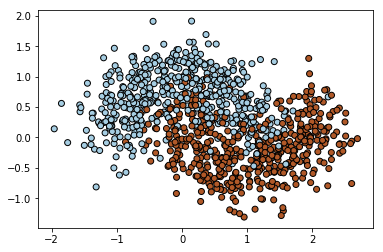

In [3]:
# (b)
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.scatter(x = X[:, 0], y = X[:,1], c=Y, cmap="Paired", edgecolors="black")

In [4]:
# (c)
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

def get_100random_index(X_data):
    shuffle = np.arange(len(X_data))
    np.random.shuffle(shuffle)
    return shuffle[0:100]

X_list = list()
Y_list = list()
for i in range(0,3):
    random_index = get_100random_index(X)
    list.append(X_list, X[random_index])
    list.append(Y_list, Y[random_index])
k_list = [1, 25, 50]
knn_list = list()
for i in range(0, 3):
    for k in k_list:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_list[i], Y_list[i])
        list.append(knn_list, knn)
        pass
    pass

100%|██████████| 3/3 [00:03<00:00,  1.20s/it]


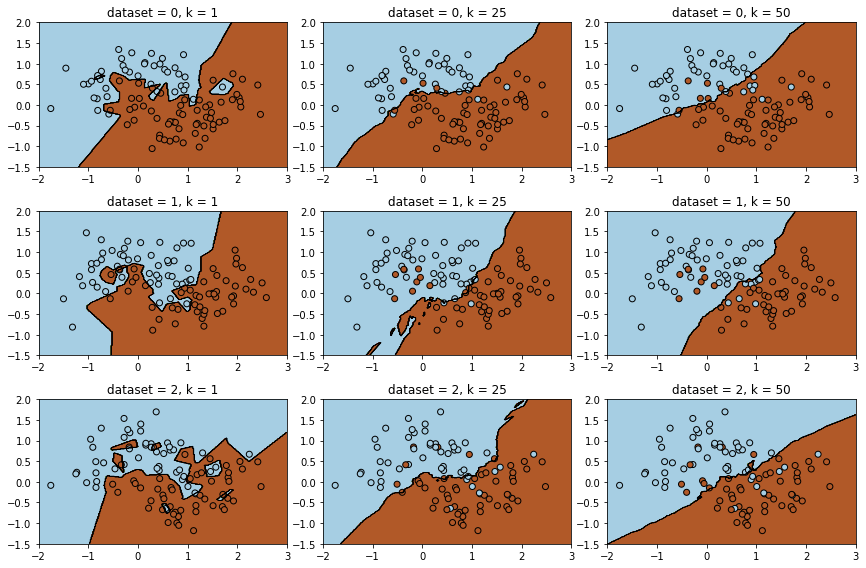

In [6]:
# (d)
from tqdm import tqdm, trange
x1 = np.linspace(-2, 3, 300)
x2 = np.linspace(-1.5, 2, 300)

x1v, x2v = np.meshgrid(x1, x2)
X_test = np.column_stack((x1v.ravel(),
                          x2v.ravel()))
plt.figure(figsize=(12, 8))
for i in trange(0,3):
    for j in trange(0,3):
        plt.subplot(3, 3, i*3+j + 1)
        y_hat = knn_list[i*3+j].predict(X_test)
        plt.contourf(x1v, x2v, y_hat.reshape(x1v.shape), cmap="Paired")
        plt.contour(x1v, x2v, y_hat.reshape(x1v.shape), colors = "black", linewidths=0.5)
        plt.scatter(x = X_list[i][:, 0], y = X_list[i][:, 1], c=Y_list[i], cmap="Paired", edgecolors="black")
        plt.xlim(x1v.min(), x1v.max())
        plt.ylim(x2v.min(), x2v.max())
        plt.title("dataset = {0}, k = {1}".format(i, k_list[j]))
plt.tight_layout()
plt.show()

(e)

The decision boundries across rows are somewhat similar to each other. The reason is that although the 3 datasets were selected from 3 different random sampling methods, it did not differ too much. This similarity is affected by k. As the plots show, when k inceases, the decision boundries become more similar. On the other hand,  the decision boundies become smoother from left to right column.

"k = 25" is the best fit to our dataset. It neither overfit or underfit the dataset.

"k = 1" varies most, because its prediction was only based on the closest point. As a result, as the dataset changes, its decision boundry changes significantly. In other words, it overfits the noise inside the dataset.

(f)

As the plots shows, the decision boundries become more similar when k increases. Therefore, when k inceases, the varience decreases. Also, the number of wrongly classified points are more, when k increases. Therefore, when k inceases, the bias also increases.

## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**

100%|██████████| 500/500 [00:22<00:00, 11.93it/s]

minimum error: 0.10399999999999998, the optimal k: 132


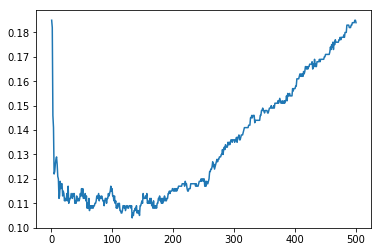

In [12]:
# (a)
X_test2, Y_test2 = make_moons(n_samples = 1000, noise = 0.35)

# (b)
error = list()
for i in trange(1, 501):
    knn_classifier = KNeighborsClassifier(n_neighbors=i)
    knn_classifier.fit(X, Y)
    y_hat = knn_classifier.predict(X_test2)
    list.append(error, 1 - accuracy(Y_test2, y_hat))

plt.plot(np.arange(1, 501), error)

(c) The plot shows a U-shape. The error fisrt decreases then increases.

(d) When k is close to 1, it has high varience. When k is close to 500, it has high bias.

(e) When the error reaches to the lowest point, k will be the optimal value.

In [16]:
print("In this case, the minimum error is {}, and the optimal k is {}".format(error[np.argpartition(error, 1)[0]],np.argpartition(error, 1)[0]))

In this case, the minimum error is 0.10399999999999998, and the optimal k is 132


(f) other model's parameters. For example, the number of predictors will control the flexibility of linear regression model.

## 7
**[20 points] Linear regression and nonlinear transformations**. You're given a dataset below that is partitioned into a training and testing dataset. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** A linear model does not mean that non-linear relationships cannot be explored. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

In [51]:
x_train = [3.19,9.26,9.38,8.77,7.91,3.79,3.18,7.61,2.36,6.26,6.62,1.53,6.25,7.93,7.07,4.58,4.14,2.14,9.04,4.56,3.99,6.71,2.51,0.84,6.13,5.22,0.25,3.60,1.36,5.59,4.81,1.14,0.36,2.31,1.37,5.86,4.23,9.48,2.26,0.77,4.33]
y_train = [46.40,172.16,209.00,203.31,82.88,62.57,14.38,177.00,8.01,82.35,84.84,-5.59,54.96,167.17,83.09,-21.63,94.64,63.97,106.57,38.99,88.26,66.99,-11.12,-0.44,65.08,61.47,-0.61,23.85,10.55,83.69,54.35,51.82,-18.63,1.98,4.90,55.44,50.09,155.66,45.57,18.12,30.58]

x_test = [5.65,0.07,8.84,5.14,6.65,1.35,5.45,7.39,3.35]
y_test = [98.52,16.09,198.45,75.90,85.11,47.64,14.76,141.03,-39.13]

**ANSWER**

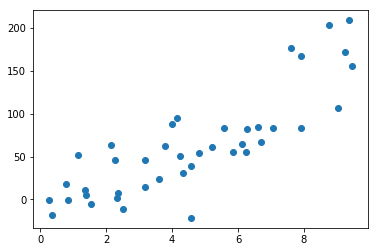

In [91]:
# (a)
plt.scatter(x_train, y_train)

In [89]:
# (b)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x_train_b = np.array(x_train)[:, None]
y_train_b = np.array(y_train)

reg_b = LinearRegression().fit(x_train_b, y_train_b)
r_2 = reg_b.score(x_train_b, y_train_b)
y_hat_b = reg_b.predict(x_train_b)
print("Performance on training dataset: \n")
print("R^2 = {:.2f}".format(r_2))
print("MSE = {:.2f}".format(mean_squared_error(y_train_b, y_hat_b)))
print("y = {:.2f} + {:.2f}·x".format(reg_b.intercept_, reg_b.coef_[0]))

Performance on training dataset: 

R^2 = 0.70
MSE = 1052.59
y = -21.73 + 18.30·x


In [90]:
# (c)
log_x_train = np.log(x_train)
x_train_c = np.column_stack((x_train, log_x_train))
y_train_c = np.array(y_train)

reg_c = LinearRegression().fit(x_train_c, y_train_c)
r_2 = reg_c.score(x_train_c, y_train_c)
y_hat_c = reg_c.predict(x_train_c)
print("Performance on training dataset: \n")
print("R^2 = {:.2f}".format(r_2))
print("MSE = {:.2f}".format(mean_squared_error(y_train_c, y_hat_c)))
print("y = {:.2f} + {:.2f}·x + {:.2f}·log(x)".format(reg_c.intercept_, reg_c.coef_[0], reg_c.coef_[1]))

Performance on training dataset: 

R^2 = 0.72
MSE = 980.35
y = -23.68 + 25.08·x + -23.33·log(x)


(-21.63, 209.0)

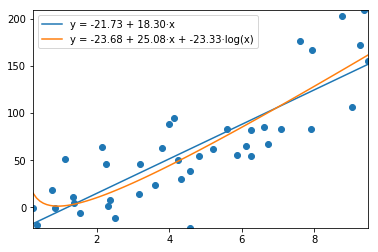

In [74]:
# (d)
x = np.linspace(np.array(x_train).min(), np.array(x_train).max(), 100)
y_b = reg_b.intercept_ + reg_b.coef_[0] * x
y_c = reg_c.intercept_ + reg_c.coef_[0] * x + reg_c.coef_[1] * np.log(x)
plt.scatter(x_train, y_train)
line_b, = plt.plot(x, y_b, label="y = {:.2f} + {:.2f}·x".format(reg_b.intercept_, reg_b.coef_[0]))
line_c, = plt.plot(x, y_c, label="y = {:.2f} + {:.2f}·x + {:.2f}·log(x)".format(reg_c.intercept_, reg_c.coef_[0], reg_c.coef_[1]))
plt.legend(handles=[line_b, line_c])
plt.xlim(np.array(x_train).min(), np.array(x_train).max())
plt.ylim(np.array(y_train).min(), np.array(y_train).max())

In [88]:
# (e)
from sklearn.metrics import r2_score

x_test_b = np.array(x_test)[:, None]
x_test_c = np.column_stack((x_test, np.log(x_test)))
y_test_np = np.array(y_test)
print("Performance on test dataset: \n")

y_hat_b = reg_b.predict(x_test_b)
print("Linear function:", "y = {:.2f} + {:.2f}·x".format(reg_b.intercept_, reg_b.coef_[0]))
print("R^2 = {:.2f}".format(r2_score(y_test_np, y_hat_b)))
print("MSE = {:.2f}".format(mean_squared_error(y_test_np, y_hat_b)))

print()

print("Function with log transformation:", "y = {:.2f} + {:.2f}·x + {:.2f}·log(x)".format(reg_c.intercept_, reg_c.coef_[0], reg_c.coef_[1]))
y_hat_c = reg_c.predict(x_test_c)
print("R^2 = {:.2f}".format(r2_score(y_test_np, y_hat_c)))
print("MSE = {:.2f}".format(mean_squared_error(y_test_np, y_hat_c)))

Performance on test dataset: 

linear function: y = -21.73 + 18.30·x
R^2 = 0.56
MSE = 2023.31

with log transformation: y = -23.68 + 25.08·x + -23.33·log(x)
R^2 = 0.63
MSE = 1676.33


(f)

Function with log transformation performs better on both training data and test data, because the R^2 of function with log transformation is larger than the R^2 of linear function and the MSE of the function with log transformation is lower than the MSE of linear function. 

We can also see from the scatter plot of the original data. Since the plot shows a non-linear relationship between x and y, the linear function cannot catch the underlying function of x and y.

(g)

If the test data were significantly different from the training dataset, the hidden function of training dataset is different from the hidden function of test dataset. Therefore, our model which is built from the training data cannot catches the function of x and y in the test data.